# A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd
%matplotlib inline

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel ("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


In [4]:
df = df.head(30000)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [5]:
#The dataset shows an overview of the dogs in New York City. The rows are the different dogs. 
#The columns are descriptions of those dogs and other data about their owner. 

In [6]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

In [7]:
#column "Animal Name" contains information about the name of the dog
#columns "Vaccinated" shows whether the dog was vaccinated or not so far

df[['Animal Name', 'Vaccinated']].head()

,Animal Name,Vaccinated
0,BLUE MACK,Yes
1,Indie Zephir,Yes
2,Bilal,No
3,Buddy,Yes
4,Ali,No


# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below.

In [8]:
#What's the most popular dog name?
#What's the most frequent color?
#What's the average dog age?
#IN which ZIP code do the most unvaccinated dogs live?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

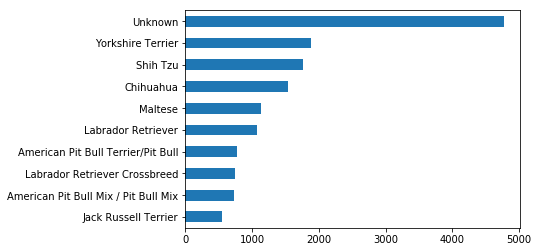

In [9]:
df['Primary Breed'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')

In [10]:
df['Animal Secondary Color'].str.lower().head(10)

0    black
1      tan
2      NaN
3    white
4      NaN
5      red
6     gray
7    black
8      NaN
9    black
Name: Animal Secondary Color, dtype: object

In [11]:
df['Animal Third Color'].value_counts().head()

WHITE    1156
BLACK     926
White     675
BROWN     627
Black     521
Name: Animal Third Color, dtype: int64

In [12]:
df['Animal Third Color'].value_counts(dropna=False).head()

NaN      23371
WHITE     1156
BLACK      926
White      675
BROWN      627
Name: Animal Third Color, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

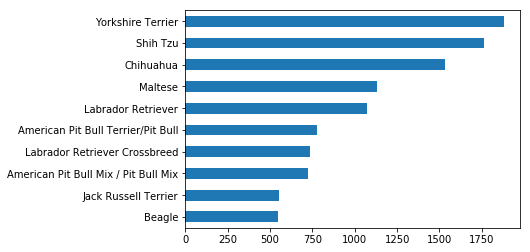

In [13]:
df['Primary Breed'].value_counts().head(11).tail(10).sort_values(ascending=True).plot(kind='barh')

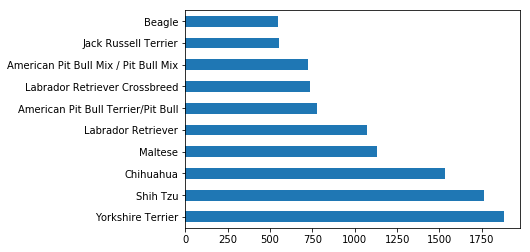

In [14]:
dogs_not_unknown = df[df['Primary Breed'] != 'Unknown']
dogs_not_unknown['Primary Breed'].value_counts().head(10).plot(kind='barh')

## What are the most popular dog names?

In [15]:
df['Animal Name'].value_counts().head(20)

UNKNOWN     203
Max         202
Unknown     197
Bella       193
Charlie     172
Lola        146
Rocky       140
Lucy        128
Coco        114
Buddy       113
Lucky       106
Daisy        90
Lily         88
Princess     86
Bailey       83
Luna         81
Molly        81
Toby         79
Oliver       79
Chloe        78
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [16]:
df[df['Animal Name'] == 'Max'].shape
# 202 dogs are called Max

(202, 15)

In [17]:
df[df['Animal Name'] == 'Maxwell'].shape
# 11 dogs are called Maxwell

(11, 15)

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [18]:
df['Guard or Trained'].value_counts(normalize=True) * 100
# 0,08 % of the dogs are guard or trained. 

No     99.914254
Yes     0.085746
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [19]:
df['Guard or Trained'].value_counts()
# 17 dogs out of 19809 are guard or trained.

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [20]:
df['Guard or Trained'].value_counts(dropna=False)
#for 10174 dogs we do not have information.

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

In [21]:
#df[df['Secondary Breed'].str.contains("TER", na=False)]
df[df['Guard or Trained'].str.contains("NaN", na=True)]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,NaN,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12
11,11232,muneca,F,Beagle,NaN,White,Black,Brown,2013-05-01,Yes,NaN,Yes,2014-09-13 00:58:36.603,2014-09-13,2019-09-13
12,10022,Elizabeth,F,Cavalier King Charles Spaniel,NaN,Brown,White,NaN,2013-03-01,Yes,NaN,Yes,2014-09-13 07:07:54.303,2014-09-13,2019-09-13
14,10025,Dottie,F,"Poodle, Standard",NaN,Cream,NaN,NaN,2013-04-01,Yes,NaN,Yes,2014-09-13 11:28:32.237,2014-09-13,2017-09-13
15,11215,Lucy Moo Jung,F,Dachshund Smooth Coat Miniature,NaN,White,Black,NaN,2014-03-01,Yes,NaN,Yes,2014-09-13 13:40:23.943,2014-09-13,2019-09-13
18,11220,Ricky,M,German Shepherd Dog,NaN,Black,Tan,NaN,2014-07-01,No,NaN,No,2014-09-13 15:40:08.160,2014-09-13,2017-09-13
19,10002,Avery,F,American Pit Bull Terrier/Pit Bull,NaN,Gray,NaN,NaN,2014-06-01,No,NaN,No,2014-09-13 15:55:11.457,2014-09-13,2019-09-13


## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [22]:
df['Guard or Trained'].fillna('No', inplace=True)
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## What are the top dog breeds for guard dogs? 

In [23]:
df[df["Guard or Trained"] == "Yes"]["Primary Breed"].value_counts()

Unknown                       5
German Shepherd Dog           3
Golden Retriever              1
Schnauzer, Miniature          1
Labrador Retriever            1
Rottweiler                    1
German Shepherd Crossbreed    1
Shih Tzu                      1
Yorkshire Terrier             1
Doberman Pinscher             1
Poodle, Standard              1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [24]:
df['Year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [25]:
df["age"] = 2017 - df["Year"]

In [26]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,4
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,3
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,9
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,3


In [27]:
df['age'].describe()
#average age of dogs is 7.7 years

count    30000.000000
mean         7.712433
std          4.066803
min          2.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         33.000000
Name: age, dtype: float64

# Joining data together

In [28]:
df_zip = pd.read_csv("zipcodes-neighborhoods.csv")
df_zip.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [29]:
combined_df = df.merge(df_zip, left_on='Owner Zip Code', right_on='zip')
combined_df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024,Manhattan
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,9,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,6,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,6,Upper West Side,10024,Manhattan
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,10,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [30]:
df_zip[df_zip['borough'] == 'Bronx']

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
5,Bronx Park and Fordham,10468,Bronx
6,High Bridge and Morrisania,10451,Bronx
7,High Bridge and Morrisania,10452,Bronx
8,High Bridge and Morrisania,10456,Bronx
9,Hunts Point and Mott Haven,10454,Bronx


In [31]:
#df_zip[df_zip['borough'] == 'Bronx']['zip']

In [32]:
combined_df[combined_df['borough'] == 'Bronx']['Animal Name'].value_counts().head(10)

Bella       22
Max         21
Rocky       20
Unknown     16
Princess    15
Lucky       15
Coco        14
Luna        13
Buddy       13
Charlie     12
Name: Animal Name, dtype: int64

In [33]:
combined_df[combined_df['neighborhood'] == 'Upper East Side']['Animal Name'].value_counts().head(10)

Charlie    19
Bella      12
NO NAME    11
Lucy       10
Lola       10
Buddy       9
Molly       9
Oliver      9
Bailey      8
Penny       8
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [34]:
combined_df[combined_df['borough'] == 'Bronx']['Primary Breed'].value_counts().head(2)

Unknown              404
Yorkshire Terrier    250
Name: Primary Breed, dtype: int64

In [35]:
combined_df[combined_df['borough'] == 'Manhattan']['Primary Breed'].value_counts().head(2)

Unknown      1619
Chihuahua     511
Name: Primary Breed, dtype: int64

In [36]:
combined_df[combined_df['borough'] == 'Queens']['Primary Breed'].value_counts().head(2)

Unknown              1040
Yorkshire Terrier     434
Name: Primary Breed, dtype: int64

In [37]:
combined_df[combined_df['borough'] == 'Staten Island']['Primary Breed'].value_counts().head(2)

Unknown              501
Yorkshire Terrier    171
Name: Primary Breed, dtype: int64

In [38]:
combined_df[combined_df['borough'] == 'Brooklyn']['Primary Breed'].value_counts().head(2)

Unknown              1150
Yorkshire Terrier     501
Name: Primary Breed, dtype: int64

In [39]:
df_nounknowns = combined_df[combined_df['Primary Breed'] != 'Unknown']
df_nounknowns.groupby('borough')['Primary Breed'].value_counts().groupby(level=0).head(3)

borough        Primary Breed     
Bronx          Yorkshire Terrier     250
               Shih Tzu              244
               Chihuahua             208
Brooklyn       Yorkshire Terrier     501
               Shih Tzu              481
               Chihuahua             391
Manhattan      Chihuahua             511
               Yorkshire Terrier     505
               Shih Tzu              454
Queens         Yorkshire Terrier     434
               Shih Tzu              395
               Chihuahua             306
Staten Island  Yorkshire Terrier     171
               Shih Tzu              165
               Labrador Retriever    123
Name: Primary Breed, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

In [45]:
spayed_no = combined_df[combined_df['Spayed or Neut'] == 'No']

In [50]:
spayed_no['Primary Breed'].value_counts().sort_values(ascending=False)

Yorkshire Terrier                       531
Unknown                                 416
Shih Tzu                                401
Chihuahua                               303
Maltese                                 300
American Pit Bull Terrier/Pit Bull      173
Pomeranian                              148
German Shepherd Dog                     124
Labrador Retriever                      113
Golden Retriever                        110
Cocker Spaniel                           96
Shiba Inu                                93
French Bulldog                           88
American Pit Bull Mix / Pit Bull Mix     86
Jack Russell Terrier                     80
Havanese                                 77
Cavalier King Charles Spaniel            74
Siberian Husky                           73
Boston Terrier                           72
Bull Dog, English                        71
Beagle                                   69
Poodle, Toy                              69
Pug                             

In [51]:
combined_df.groupby('Animal Gender')['Spayed or Neut'].value_counts().sort_values(ascending=False).head(10)

Animal Gender  Spayed or Neut
M              Yes               12677
F              Yes               11620
M              No                 3343
F              No                 1930
               Yes                   3
Name: Spayed or Neut, dtype: int64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [52]:
colors = ["BLACK", "WHITE", "GREY"]
df["monochrome"] = df["Animal Third Color"].isnull() & df["Animal Secondary Color"].isnull() & df["Animal Dominant Color"].str.upper().isin(colors)
df["monochrome"].value_counts()[True]

3938

## How many dogs are in each borough? Plot it in a graph.

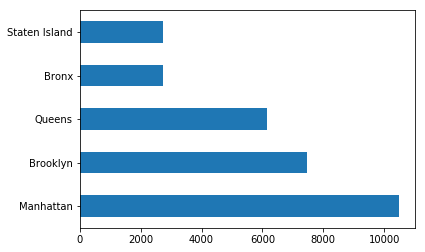

In [53]:
combined_df['borough'].value_counts().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [54]:
df_pop_boro = pd.read_csv("boro_population.csv")
df_pop_boro.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [55]:
df_pop_com = combined_df.merge(df_pop_boro, left_on='borough', right_on='borough')
df_pop_com.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Application Date,License Issued Date,License Expired Date,Year,age,neighborhood,zip,borough,population,area_sqmi
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024,Manhattan,1644518,23
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,...,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,9,Upper West Side,10024,Manhattan,1644518,23
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,...,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,6,Upper West Side,10024,Manhattan,1644518,23
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,...,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,6,Upper West Side,10024,Manhattan,1644518,23
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,...,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,10,Upper West Side,10024,Manhattan,1644518,23


In [56]:
df_pop_com['borough'].value_counts() 

Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: borough, dtype: int64

In [57]:
df_pop_com.groupby('population')

In [58]:
round(df_pop_com['borough'].value_counts().div(df_pop_boro['population'].values) * 1000)
df_pop_com['borough'].value_counts().div(df_pop_boro['population'].values) * 100
#Manhattan has the highest rate of dogs/per capita(DPC)

Manhattan        0.637147
Brooklyn         0.512971
Queens           0.233395
Bronx            0.117479
Staten Island    0.574640
dtype: float64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

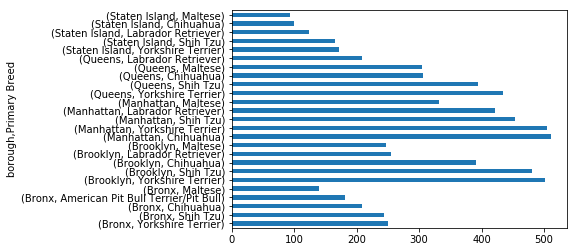

In [59]:
df_nounknowns = combined_df[combined_df['Primary Breed'] != 'Unknown']
df_nounknowns.groupby('borough')['Primary Breed'].value_counts().groupby(level=0).head(5).plot(kind='barh')

## What percentage of dogs are not guard dogs?

In [60]:
df['Guard or Trained'].value_counts(normalize=True) * 100
#0.05% of the dogs are guard dogs

No     99.943333
Yes     0.056667
Name: Guard or Trained, dtype: float64